# Homework #1

Remember: You must ingest the data to your notebooks directly from the data server. Also, don't write the same code with modifications to do similar things over and over again. Write a function.

---Merhaba hocam, siz ödeve bakmaya başlamadan önce ödevim hakkında bilgi vermek istedim. 
Yapmaya çalışırken zorlandım, beklenmedik hatalarla karşılaştım ve çözmek için zamanım yetmedi maalesef. Ödev için çook daha fazla zaman ayırmam gerektiğini gördüm. Aynı şeyleri tekrar tekrar yazmayın dediğiniz için de öyle yapmak yerine hiç yazmadım. Dersin beni zorlayacağını biliyordum ama çok çok daha fazla çalışmam ve eksiklerimi kapatmam lazım anlaşılan. O yüzden ilk ödev için kusura bakmayın :(---

## Question 1

Use [World Bank's Data Service](https://data.worldbank.org/) to retrieve

* Literacy rates of women (percentage of females ages 15 and above)
* Child mortality rate, under 5 year old. (per 1,000 live births)
* Gini index (Economic Inequality)

1. Plot each dataset for Turkey from earliest date available until this year.
2. Plot the same data for Greece, Bulgaria, Romania, Poland, Syria and Iran for the same periods. 
3. Do a scatter plot of female literacy rate against child mortality rate for Turkey. Do you see a relation? Which direction do you think the relation works?
4. Do a scatter plot of female literacy rate against gini index for Turkey. Do you see a relation? Which direction do you think the relation works?
5. Do a scatter plot of child mortality rate against the gini index for Turkey. Do you see a relation? Which direction do you think the relation works?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import gzip

from urllib.request import urlopen
from xmltodict import parse
from zipfile import ZipFile
from io import BytesIO
import wbdata

In [20]:
# with urlopen('https://api.worldbank.org/v2/en/indicator/SE.ADT.LITR.FE.ZS?downloadformat=excel') as url:
#     literacy_data = pd.read_excel(url.read())

# literacy_data

In [86]:
literacy_data = wbdata.get_dataframe(indicators = {'SE.ADT.LITR.FE.ZS' : "Literacy rates of women"}, country = "TUR")
literacy_data 

,Literacy rates of women
date,
2021,NaN
2020,NaN
2019,94.424042
2018,NaN
2017,93.498268
...,...
1964,NaN
1963,NaN
1962,NaN


In [39]:
literacy_data.index

Index(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013',
       '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004',
       '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986',
       '1985', '1984', '1983', '1982', '1981', '1980', '1979', '1978', '1977',
       '1976', '1975', '1974', '1973', '1972', '1971', '1970', '1969', '1968',
       '1967', '1966', '1965', '1964', '1963', '1962', '1961', '1960'],
      dtype='object', name='date')

In [59]:
literacy_data.index = pd.to_datetime(literacy_data.index)
# since years start from last year, i have changed them to datetime to see from earliest date until this year.

<AxesSubplot: xlabel='date'>

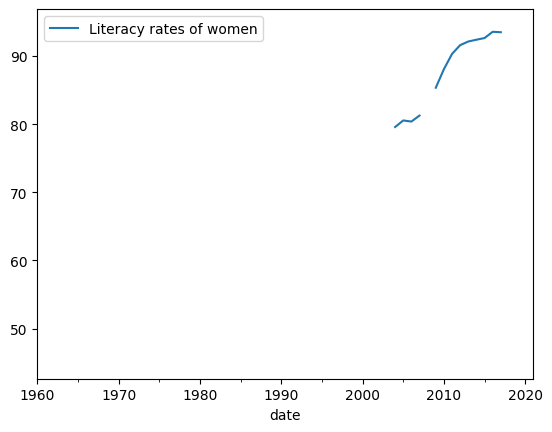

In [60]:
literacy_data.plot() # as we can see we have a lot of null values and it gives 

In [61]:
# literacy_data.isna().sum()
literacy_data1 = literacy_data.dropna()
literacy_data1

,Literacy rates of women
date,
2019-01-01,94.424042
2017-01-01,93.498268
2016-01-01,93.563011
2015-01-01,92.645813
2014-01-01,92.401817
2013-01-01,92.138077
2012-01-01,91.604523
2011-01-01,90.310097
2010-01-01,88.073174


<AxesSubplot: xlabel='date'>

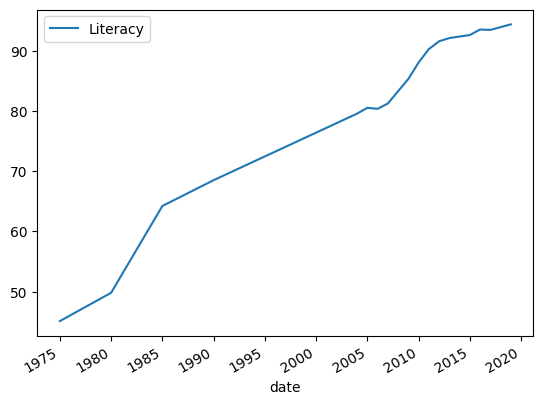

In [50]:
literacy_data1.plot() 

In [ ]:
# according to graph, literacy rates of women (ages 15 and above) is increasing from earliest date available until this year in Turkey

In [55]:
mortality_data = wbdata.get_dataframe(indicators = {'SH.DYN.MORT' : "Child mortality"}, country = "tr")
mortality_data

,Child mortality
date,
2021,NaN
2020,9.5
2019,10.1
2018,10.7
2017,11.4
...,...
1964,225.7
1963,233.5
1962,241.4


<AxesSubplot: xlabel='date'>

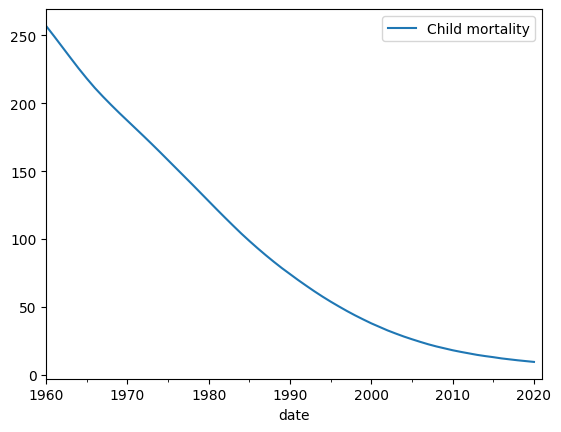

In [62]:
mortality_data.index = pd.to_datetime(mortality_data.index)
mortality_data.plot()

In [ ]:
'''
according to the graph, child mortality rate, under 5 year old. (per 1,000 live births) is decreasing from 60s until this year in Turkey
which is a good thing
'''

In [72]:
gini_index_data = wbdata.get_dataframe(indicators = {'SI.POV.GINI' : "Gini-index"}, country = "tr")
gini_index_data 

,Gini-index
date,
2021,NaN
2020,NaN
2019,41.9
2018,41.9
2017,41.4
...,...
1964,NaN
1963,NaN
1962,NaN


<AxesSubplot: xlabel='date'>

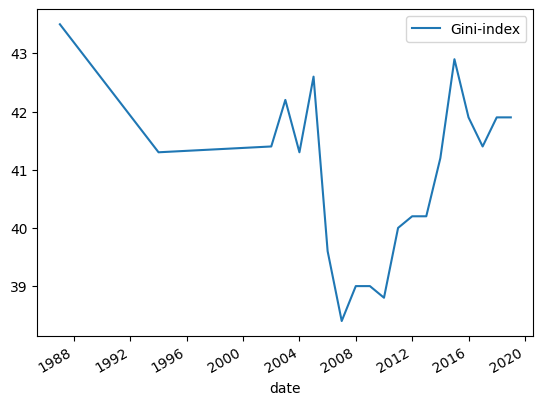

In [74]:
gini_index_data.index = pd.to_datetime(gini_index_data.index)
gini_index_data1 = gini_index_data.dropna()
gini_index_data1.plot() 

In [33]:
''' 
Gini index is a summary measure of income inequality. As we can see from the graph above, it is going down in 2008, we can understand that 
it is because of the world crisis 
'''

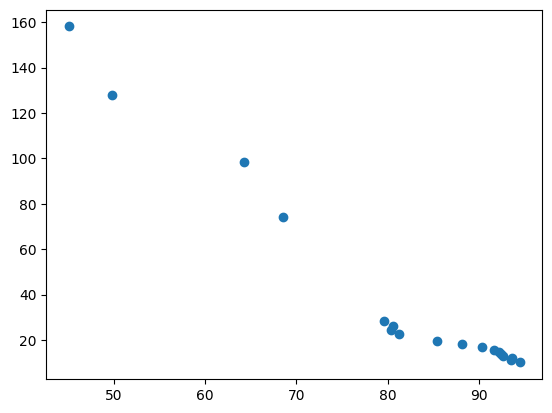

In [75]:
plt.scatter(literacy_data, mortality_data)
plt.show()

In [ ]:
'''From the graph above, i can say that literacy rate and child mortality has negative relationship.
Which means when literaty rate is increasing, chil mortality rate is decreasing
'''

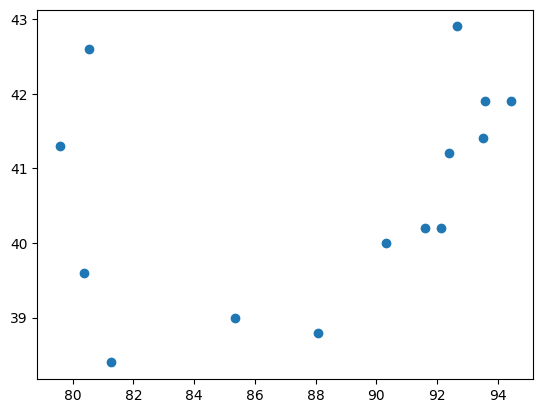

In [76]:
plt.scatter(literacy_data, gini_index_data)
plt.show()

In [ ]:
''' 
i could not see any relation, maybe it is because i have plotted it in a wrong way 
'''

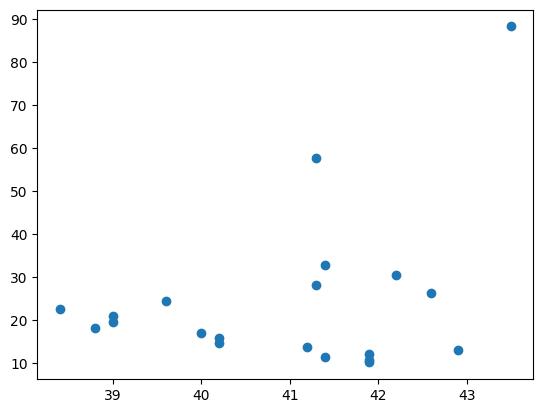

In [77]:
plt.scatter(gini_index_data, mortality_data)
plt.show()

In [ ]:
''' 
No relation between child mortality rate and the gini index for Turkey, according to the graph above.
Also it seems like we have outliers.
'''

## Question 2

Use Istanbul Municipality Data Server to retrieve the data on [Rail Transportation Data](https://data.ibb.gov.tr/dataset/yas-grubuna-gore-rayli-sistemler-istasyon-bazli-yolcu-ve-yolculuk-sayilari).

1. Explore the dataset and explain each column.
2. Notice that the longitude and lattitude data is not recorded correctly. However, it is easy to correct the data. Explain how you would correct it and then write a function to correct it.
3. Notice that the passenger information is split according to age brackets. Find the total number of passengers for each station ~~in each month~~ and store it in a pandas dataframe. Then plot it on a map of Istanbul. Use disks of different sizes depending on the total number of passengers.
4. Write a function that accepts the age bracket as input (<20, 20-30, 30-60, 60+, unknown) and returns a probability an array of maps (dictionaries) of the form

    {Station Name: probability that the specific age bracket uses the station}
5. The return value for the function you wrote above is a probability distribution on the set of stations, i.e. the usage patterns of different age brackets. Figure out which stations are favored by each age bracket.
6. How do we check that the usage patterns for different age brackets are different? Use your idea to write a code to check for these differences.

In [90]:
with urlopen('https://data.ibb.gov.tr/dataset/d3df8db4-1ac6-4bfe-8896-7ec1159caa2b/resource/7aec630d-2757-4da0-97f1-71b140abd818/download/2021-yl-ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.xlsx') as url:
    data = pd.read_excel(url.read())

data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7.424,4.227,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,20-30
1,18.374,9.479,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,30-60
2,3.190,1.430,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,60+
3,949.000,469.000,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,<20
4,8.673,4.222,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9.295,8.209,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,20-30
17078,10.554,9.361,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,30-60
17079,1.552,1.235,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,60+
17080,3.319,2.632,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,<20


In [ ]:
'''
Lets explore the dataset and explain each column.

This dataset contains the daily passenger and journey numbers at the stations of the rail systems.
Also it is detailed by age group. We have 11 columns such as passage and passanger count, month and year info of transaction, line,
name and number of stations, town, also geographic coordinate systems latitude and longitude infos.
'''


# Question 3

For this question use Yahoo Finance API via [yfinance](https://pypi.org/project/yfinance/) library. Retrieve the data for Microsoft [MSFT], Apple [AAPL] and NASDAQ-100 [NDX]. from January 1, 2000.

1. Calculate the log of each series, and then calculate the first derivative of the result. What you got is called the [log-return](https://core.ac.uk/download/pdf/161062652.pdf) of each series. 
2. Merge the series you obtain in Step 1 into a single pandas dataframe.
3. Plot the histograms of results you obtained above (use 10 bins).
4. Plot all three series in a single plot to compare. Do you see a relationship? 
5. How do we see if there are any correlations between these series? What is the statistically correct way of testing it? Find the right statistical test and measure all three correlations.

In [93]:
import yfinance as yf